#Introduction

Hadoop is an open-source framework which is mainly used for storage purposes and maintaining and analyzing a large amount of data or datasets on the clusters of commodity hardware, which means it is actually a data management tool.

##Hadoop mainly works on 3 different modes:

###Standalone Mode

Pseudo-distributed Mode
Fully-distributed Mode
Standalone Mode

By default, Hadoop is configured to run in a non distributed mode. It runs as a single Java process. Instead of HDFS, this mode utilizes the local file system. This mode is useful for debugging and there isn't any need to configure core-site.xml, hdfs-site.xml, mapred-site.xml, masters & slaves. Stand-alone mode is usually the fastest mode in Hadoop.

###Pseudo-distributed Mode

Hadoop can also run on a single node in a Pseudo-distributed mode. In this mode, each daemon runs on separate java processes. In this mode custom configuration is required (core-site.xml, hdfs-site.xml, mapred-site.xml). Here HDFS is utilized for input and output. This mode of deployment is useful for testing and debugging purposes.

###Fully-distributed Mode

This is the production mode of Hadoop. In this mode typically one machine in the cluster is designated as NameNode and another as Resource Manager exclusively. These are masters. All other nodes act as Data Node and Node Manager. These are the slaves. Configuration parameters and environment need to be specified for Hadoop Daemons.

Installing Java 8
Hadoop is a java programming-based data processing framework

OpenJDK is a development environment for building applications, applets, and components using the Java programming language.

# Installing Java 8
Hadoop is a java programming-based data processing framework

OpenJDK is a development environment for building applications, applets, and components using the Java programming language.

In [19]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [20]:
!java -version

openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


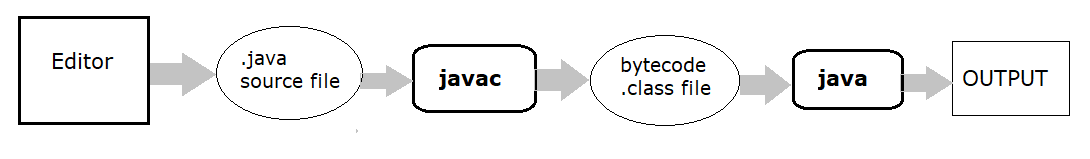

In [21]:
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [22]:
!update-alternatives --set javac /usr/lib/jvm/java-8-openjdk-amd64/bin/javac

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/javac to provide /usr/bin/javac (javac) in manual mode


#### Update JPS (Java Process Status)

In [23]:
!update-alternatives --set jps /usr/lib/jvm/java-8-openjdk-amd64/bin/jps

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/jps to provide /usr/bin/jps (jps) in manual mode


#### See Java version

In [24]:
!java -version

openjdk version "1.8.0_402"
OpenJDK Runtime Environment (build 1.8.0_402-8u402-ga-2ubuntu1~22.04-b06)
OpenJDK 64-Bit Server VM (build 25.402-b06, mixed mode)


## Creating Java related environment variables

The JAVA_HOME is an operating system environment variable points to the file system location where the JDK or JRE was installed.



In [25]:
#Finding the default Java path
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-8-openjdk-amd64/jre/


# Installing Secure Shell Server (SSHD)
We need to define a means for the master node to remotely access every node in our cluster.

Hadoop uses passphrases SSH for the communication between the nodes.

SSH is a cryptographic network protocol for operating network services securely over an unsecured network.

SSH utilizes standard public key criptography to create a pair of keys for user verification:

one public and one private.

The **pseudo distributed mode** is special case of fully the distributed mode, in which the single host is localhost (our machine). We need to make sure that to access to localhost and login we do not need to enter a password. Therefore, SSH needs to be set up to allow passwordless login for the Hadoop user. The simplest way to achive this is to generate a public-private key pair.

In [1]:
!apt-get install openssh-server -qq > /dev/null
!service ssh start

!grep Port /etc/ssh/sshd_config

#Creating a new rsa key pair with empty password
!ssh-keygen -t rsa -P "" -f ~/.ssh/id_rsa

 * Starting OpenBSD Secure Shell server sshd
   ...done.
#Port 22
#GatewayPorts no
Generating public/private rsa key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:jRZrE7qjuXEc96VXEV66eZ4RP+AdzcqrqXDafO0Ldno root@3db6ed18c7d2
The key's randomart image is:
+---[RSA 3072]----+
|              . .|
|             . =.|
|        o    .+oo|
|       . *  ..o=+|
|      o S . ..*+o|
|     . * o o . ++|
|    . = . + +.o..|
|     = . * o.*E  |
|    +.  . +o+oo. |
+----[SHA256]-----+


In [2]:
# See id_rsa.pub content
!more /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABgQDz+fq42UXBEtw/ywFM6jAySSQY8m/oGYRn0q/Rnpr0mrpAsNjtj6e7AkjvrakB
bsNiRLBfaOx2pHIkB22Xp2toXodD4Mrk21Yzf7rYlWCPEcgvkF43wmoKlLQ+Pdp4qN1NB1zTvLzBH1utEyIv4W8kIKbT2xwGtUKs
UNee5xhsa+2OrWyfU3SiY8F/LOklPNmTApAHiGRUR3i5O7mESEZnC4MvDc+vVRhkJY+AiRkaCP8/9oDKxRsoEFeObewZkkD6swOE
cfw9usnwH9+uvT6G+d5KHhrC9RwkIsM9cUcf1LRmcf2273q48Y6smTm4JMsHrSkH2tYk+ZJHGEYa1bCVS5L2FPed6KJz3w/wQAOi
k6fQs/1FsDNtE96z6Y1MaYKW4UIJ5h+79jd+vrULYQxd7prhHfqaqMStpeWqVkAFmWkHy6JYCAUt/pUjIjj0t4ddItGNcUVOleqz
3WZm575BnXpZzBW3jqzliC68+t8FfVJKVX6xcukCNtJzY3ieFYc= root@3db6ed18c7d2


In [3]:
#Copying the key to autorized keys
!cat $HOME/.ssh/id_rsa.pub >> $HOME/.ssh/authorized_keys
#Changing the permissions on the key
!chmod 0600 ~/.ssh/authorized_keys

#Conneting with the local machine
!ssh -o StrictHostKeyChecking=no localhost uptime

 17:33:59 up 1 min,  0 users,  load average: 1.45, 0.62, 0.23


# Installing Hadoop 3.2.3

In [4]:
#Downloading Hadoop 3.2.3
!wget -q https://archive.apache.org/dist/hadoop/common/hadoop-3.2.3/hadoop-3.2.3.tar.gz

#Untarring the file
!sudo tar -xzf hadoop-3.2.3.tar.gz
#Removing the tar file
!rm hadoop-3.2.3.tar.gz


#Copying the hadoop files to user/local
!cp -r hadoop-3.2.3/ /usr/local/
#-r copy directories recursively

In [5]:
#Exploring hadoop-3.2.3/etc/hadoop directory
!ls /usr/local/hadoop-3.2.3/etc/hadoop
#we can see various configuration files of hadoop

capacity-scheduler.xml		  httpfs-log4j.properties     mapred-site.xml
configuration.xsl		  httpfs-signature.secret     shellprofile.d
container-executor.cfg		  httpfs-site.xml	      ssl-client.xml.example
core-site.xml			  kms-acls.xml		      ssl-server.xml.example
hadoop-env.cmd			  kms-env.sh		      user_ec_policies.xml.template
hadoop-env.sh			  kms-log4j.properties	      workers
hadoop-metrics2.properties	  kms-site.xml		      yarn-env.cmd
hadoop-policy.xml		  log4j.properties	      yarn-env.sh
hadoop-user-functions.sh.example  mapred-env.cmd	      yarnservice-log4j.properties
hdfs-site.xml			  mapred-env.sh		      yarn-site.xml
httpfs-env.sh			  mapred-queues.xml.template


We need to configure a few things before running Hadoop. That is, we need to either add or modify few parameters in these configuration files to operate Hadoop in whichever mode we want to.

Configuring hadoop-env.sh file

hadoop-env.sh is a bash script that containts environment variables that are used in the scripts to run Hadoop

In [6]:
#Exploring hadoop-env.sh file
!cat /usr/local/hadoop-3.2.3/etc/hadoop/hadoop-env.sh

#
# Licensed to the Apache Software Foundation (ASF) under one
# or more contributor license agreements.  See the NOTICE file
# distributed with this work for additional information
# regarding copyright ownership.  The ASF licenses this file
# to you under the Apache License, Version 2.0 (the
# "License"); you may not use this file except in compliance
# with the License.  You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Set Hadoop-specific environment variables here.

##
## THIS FILE ACTS AS THE MASTER FILE FOR ALL HADOOP PROJECTS.
## SETTINGS HERE WILL BE READ BY ALL HADOOP COMMANDS.  THEREFORE,
## ONE CAN USE THIS FILE TO SET

The only required enviroment variable is JAVA_HOME. All the others are optional.

To specify the JAVA_HOME variable in hadoop-env.sh we need to uncomment the export line and update it with the actual directory.

In this case it should look like this:

export JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64

In [7]:
#Adding JAVA_HOME directory to hadoop-env.sh file
!sed -i '/export JAVA_HOME=/a export JAVA_HOME=\/usr\/lib\/jvm\/java-8-openjdk-amd64' /usr/local/hadoop-3.2.3/etc/hadoop/hadoop-env.sh

In [8]:
import os
#Creating environment variables
#Creating Hadoop home variable

os.environ["HADOOP_HOME"] = "/usr/local/hadoop-3.2.3"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre"
os.environ["PATH"] += f'{os.environ["JAVA_HOME"]}/bin:{os.environ["JRE_HOME"]}/bin:{os.environ["HADOOP_HOME"]}/sbin'

# Configuring XML files

The majority of Hadoop setting are contained in XML configuration files. These files are also known as resources.

They have the following structure:

<configuration>
...
  <property>
    <name>...</name>
    <value>...</value>
    <description>...</description>
  </property>
...
</configuration>
The XLM file can contained any number of the property elements. Each property element defines a specific configuration name-value pair.

Hadoop configuration is driven by two distict types of XLM configuration files:

Default (read-only): core-default.xml, hdfs-default.xml, mapred-default.xml, yarn-default.xml. These files should never be modified.
Site specific configuration files: core-site.xml, hdfs-site.xml, mapred-site.xml, yarn-site.xml. These files are loaded from class path and their values are used to overwrite the corresponding values of the properties in the matching default configuration files.

In [9]:
#Exploring hadoop-3.2.3/etc/hadoop xml files
!ls $HADOOP_HOME/etc/hadoop/*.xml

/usr/local/hadoop-3.2.3/etc/hadoop/capacity-scheduler.xml
/usr/local/hadoop-3.2.3/etc/hadoop/core-site.xml
/usr/local/hadoop-3.2.3/etc/hadoop/hadoop-policy.xml
/usr/local/hadoop-3.2.3/etc/hadoop/hdfs-site.xml
/usr/local/hadoop-3.2.3/etc/hadoop/httpfs-site.xml
/usr/local/hadoop-3.2.3/etc/hadoop/kms-acls.xml
/usr/local/hadoop-3.2.3/etc/hadoop/kms-site.xml
/usr/local/hadoop-3.2.3/etc/hadoop/mapred-site.xml
/usr/local/hadoop-3.2.3/etc/hadoop/yarn-site.xml


# Running Hadoop in Pseudo-distributed mode
In Pseudo-distributed mode all the distributed components of Hadoop come into play. That is, all the Hadoop deamons that are responsible for distributed storage and distributed processing will run on the same machine.

Master deamons:

NameNode

Resource Manager

Standby NameNode

Slave deamons:

DataNode

Node Manager

### Configuring XML files

As mentioned, by setting the properties in the site xml configuration files, we overwrite the corresponding properties in the default xml configuration files and, this way, we tell Hadoop which machines are in the cluster and where and how we want to run the Hadoop daemons

The specific content that these files need to have to make Hadoop run in Pseudo-distributed mode can be found in the documentation of the release on the official website. For Hadoop 3.2.3 the website is:

https://hadoop.apache.org/docs/r3.2.3/hadoop-project-dist/hadoop-common/SingleCluster.html

Each component in Hadoop is configured using an xml file

core-site.xml: common properties

hdfs-site.xml: HDFS properties

mapred-site.xml: MapReduce properties

yarn-site.xml: YARN properties

By configuring these xml files accordingly Hadoop can be run in one of the three modes.

In [10]:
#Content of core-site.xml file
# !cp /content/sample_data/core-site.xml $HADOOP_HOME/etc/hadoop/
!cat $HADOOP_HOME/etc/hadoop/core-site.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
</configuration>


In [27]:
#Dowloading text example to use as input
# !wget -q https://www.mirrorservice.org/sites/ftp.ibiblio.org/pub/docs/books/gutenberg/1/0/101/101.txt

In [11]:
#Adding required property to core-site.xlm file
%%bash
cat <<EOF > $HADOOP_HOME/etc/hadoop/core-site.xml
<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
  <property>
          <name>fs.defaultFS</name>
          <value>hdfs://localhost:9000</value>
          <description>Where HDFS NameNode can be found on the network</description>
  </property>
</configuration>

bash: line 26: warning: here-document at line 1 delimited by end-of-file (wanted `EOF')


In [12]:
#Content of core-site.xml after the editing
!cat $HADOOP_HOME/etc/hadoop/core-site.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
  <property>
          <name>fs.defaultFS</name>
          <value>hdfs://localhost:9000</value>
          <description>Where HDFS NameNode can be found on the network</description>
  </property>
</configuration>


In [13]:
%%bash
cat <<EOF > $HADOOP_HOME/etc/hadoop/hdfs-site.xml
<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
<property>
    <name>dfs.replication</name>
    <value>1</value>
  </property>

</configuration>
EOF

In [25]:
!cat $HADOOP_HOME/etc/hadoop/hdfs-site.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
<property>
    <name>dfs.replication</name>
    <value>1</value>
  </property>

</configuration>


In [14]:
%%bash
cat <<EOF > $HADOOP_HOME/etc/hadoop/mapred-site.xml
<?xml version="1.0"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
<property>
    <name>mapreduce.framework.name</name>
    <value>yarn</value>
  </property>
  <property>
    <name>mapreduce.application.classpath</name>
    <value>$HADOOP_HOME/share/hadoop/mapreduce/*:$HADOOP_HOME/share/hadoop/mapreduce/lib/*</value>
  </property>

</configuration>
EOF

In [15]:
!cat $HADOOP_HOME/etc/hadoop/mapred-site.xml

<?xml version="1.0"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
<property>
    <name>mapreduce.framework.name</name>
    <value>yarn</value>
  </property>
  <property>
    <name>mapreduce.application.classpath</name>
    <value>/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/*:/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/

In [16]:
%%bash
cat <<EOF > $HADOOP_HOME/etc/hadoop/yarn-site.xml
<?xml version="1.0"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->
<configuration>
<property>
    <description>The hostname of the RM.</description>
    <name>yarn.resourcemanager.hostname</name>
    <value>localhost</value>
  </property>
  <property>
    <name>yarn.nodemanager.aux-services</name>
    <value>mapreduce_shuffle</value>
  </property>
  <property>
    <name>yarn.nodemanager.env-whitelist</name>
    <value>JAVA_HOME,HADOOP_COMMON_HOME,HADOOP_HDFS_HOME,HADOOP_CONF_DIR,CLASSPATH_PREPEND_DISTCACHE,HADOOP_YARN_HOME,HADOOP_HOME,PATH,LANG,TZ,HADOOP_MAPRED_HOME</value>
  </property>

<!-- Site specific YARN configuration properties -->

</configuration>
EOF

In [17]:
!cat $HADOOP_HOME/etc/hadoop/yarn-site.xml

<?xml version="1.0"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->
<configuration>
<property>
    <description>The hostname of the RM.</description>
    <name>yarn.resourcemanager.hostname</name>
    <value>localhost</value>
  </property>
  <property>
    <name>yarn.nodemanager.aux-services</name>
    <value>mapreduce_shuffle</value>
  </property>
  <property>
    <name>yarn.nodemanager.env-whitelist</name>
    <value>JAVA_HOME,HADOOP_COMMON_HOME,HADOOP_HDFS_HO

# Formatting the HDFS Filesystem

Before HDFS can be used for the first time the file system must be formatted. The formatting process creates an empty file system by creating the storage directories and the initial versions of the NameNodes

In [26]:
!$HADOOP_HOME/bin/hdfs namenode -format

2024-04-22 17:36:43,731 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = 3db6ed18c7d2/172.28.0.12
STARTUP_MSG:   args = [-format]
STARTUP_MSG:   version = 3.2.3
STARTUP_MSG:   classpath = /usr/local/hadoop-3.2.3/etc/hadoop:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/woodstox-core-5.3.0.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/kerby-asn1-1.0.1.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/asm-5.0.4.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/commons-math3-3.1.1.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/httpcore-4.4.13.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/log4j-1.2.17.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/failureaccess-1.0.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/jackson-xc-1.9.13.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/jaxb-impl-2.2.3-1.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/commons

In [27]:
#Exploring Hadoop scripts available in sbin directory
!ls $HADOOP_HOME/sbin

distribute-exclude.sh	 refresh-namenodes.sh  start-yarn.cmd	 stop-secure-dns.sh
FederationStateStore	 start-all.cmd	       start-yarn.sh	 stop-yarn.cmd
hadoop-daemon.sh	 start-all.sh	       stop-all.cmd	 stop-yarn.sh
hadoop-daemons.sh	 start-balancer.sh     stop-all.sh	 workers.sh
httpfs.sh		 start-dfs.cmd	       stop-balancer.sh  yarn-daemon.sh
kms.sh			 start-dfs.sh	       stop-dfs.cmd	 yarn-daemons.sh
mr-jobhistory-daemon.sh  start-secure-dns.sh   stop-dfs.sh


In [28]:
#Creating other necessary enviroment variables before starting nodes
os.environ["HDFS_NAMENODE_USER"] = "root"
os.environ["HDFS_DATANODE_USER"] = "root"
os.environ["HDFS_SECONDARYNAMENODE_USER"] = "root"
os.environ["YARN_RESOURCEMANAGER_USER"] = "root"
os.environ["YARN_NODEMANAGER_USER"] = "root"

In [29]:
#Launching hdfs deamons
!$HADOOP_HOME/sbin/start-dfs.sh

Starting namenodes on [localhost]
Starting datanodes
Starting secondary namenodes [3db6ed18c7d2]
3db6ed18c7d2: Warning: Permanently added '3db6ed18c7d2' (ED25519) to the list of known hosts.


In [30]:
#Listing the running deamons
!jps

2145 SecondaryNameNode
1845 NameNode
1948 DataNode
2413 Jps


In [31]:
#Launching yarn deamons
#nohup causes a process to ignore a SIGHUP signal
!nohup $HADOOP_HOME/sbin/start-yarn.sh

nohup: ignoring input and appending output to 'nohup.out'


In [32]:
#Listing the running deamons
!jps

2145 SecondaryNameNode
2740 Jps
1845 NameNode
2645 NodeManager
2534 ResourceManager
1948 DataNode


### Monitoring Hadoop cluster with hadoop admin commands

In [33]:
#Report the basic file system information and statistics
!$HADOOP_HOME/bin/hdfs dfsadmin -report

Configured Capacity: 115658190848 (107.72 GB)
Present Capacity: 84939431936 (79.11 GB)
DFS Remaining: 84939407360 (79.11 GB)
DFS Used: 24576 (24 KB)
DFS Used%: 0.00%
Replicated Blocks:
	Under replicated blocks: 0
	Blocks with corrupt replicas: 0
	Missing blocks: 0
	Missing blocks (with replication factor 1): 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0
Erasure Coded Block Groups: 
	Low redundancy block groups: 0
	Block groups with corrupt internal blocks: 0
	Missing block groups: 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0

-------------------------------------------------
Live datanodes (1):

Name: 127.0.0.1:9866 (localhost)
Hostname: 3db6ed18c7d2
Decommission Status : Normal
Configured Capacity: 115658190848 (107.72 GB)
DFS Used: 24576 (24 KB)
Non DFS Used: 30701981696 (28.59 GB)
DFS Remaining: 84939407360 (79.11 GB)
DFS Used%: 0.00%
DFS Remaining%: 73.44%
Configured Cache Capacity: 0 (0 B)
Cache

# HDFS (Hadoop Distributed File System)

1. Setup HDFS: First, make sure you have Hadoop installed and running. You can follow online tutorials or use a Hadoop distribution like Apache Hadoop or Cloudera.

2. Create a directory: Use the HDFS command-line interface (CLI) to create a directory. For example:

In [38]:
#Creating directory in HDFS
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p /user/input

3. Copy a file to HDFS: You can copy a file from your local filesystem to HDFS using the put command. For example:

In [45]:
!$HADOOP_HOME/bin/hdfs dfs -put localfile.txt /user/input

put: `localfile.txt': No such file or directory


4. List files in HDFS: To see the files in a directory in HDFS, you can use the ls command. For example:

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -ls /user/input

5. Read a file from HDFS: You can read the contents of a file in HDFS using the cat command. For example:

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -cat /user/input/localfile.txt

6. Delete a file: You can delete a file from HDFS using the rm command. For example:

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -rm /user/input/localfile.txt

### Real Example
1. Scenario: Let's say you have a dataset containing logs from multiple servers, and you want to store and analyze these logs using Hadoop ecosystem tools.

2. Setup HDFS: Ensure that your Hadoop cluster is up and running, including the HDFS component.
Create directories in HDFS: Create directories in HDFS to organize your data. For example:

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -mkdir /logs
!$HADOOP_HOME/bin/hdfs dfs -mkdir /logs/server1
!$HADOOP_HOME/bin/hdfs dfs -mkdir /logs/server2

3. Copy log files to HDFS: Use the put command to copy your log files to HDFS. For example:

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -put server1_logs.txt /logs/server1
!$HADOOP_HOME/bin/hdfs dfs -put server2_logs.txt /logs/server2

4. List files in HDFS: Verify that the log files are successfully copied to HDFS:

In [46]:
!$HADOOP_HOME/bin/hdfs dfs -ls /logs/server1
!$HADOOP_HOME/bin/hdfs dfs -ls /logs/server2

ls: `/logs/server1': No such file or directory
ls: `/logs/server2': No such file or directory


5. Read files from HDFS: You can read the contents of the log files using the cat command:

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -cat /logs/server1/server1_logs.txt
!$HADOOP_HOME/bin/hdfs dfs -cat /logs/server2/server2_logs.txt

In [1]:
!$HADOOP_HOME/bin/hdfs dfs -mkdir -p /logs/server1
!$HADOOP_HOME/bin/hdfs dfs -touchs /logs/server1/server1_logs.txt

/bin/bash: line 1: /bin/hdfs: No such file or directory
/bin/bash: line 1: /bin/hdfs: No such file or directory


6. Perform data analysis: You can now use Hadoop ecosystem tools like MapReduce, Apache Spark, or Apache Hive to analyze the log data stored in HDFS. For example, you could write a MapReduce job to count the occurrences of specific events in the logs or use Spark SQL to perform complex analytics.

7. Cleanup: Once you're done with the analysis, you can delete the log files from HDFS:

In [40]:
!pip install pyarrow
!pip install hdfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for hdfs: filename=hdfs-2.7.3-py3-none-any.whl size=34324 sha256=bb89a99696e3c1f741f869e945f75b60829c2bf89600bfcc431a870960a8b322
  Stored in directory: /root/.cache/pip/wheels/e5/8d/b6/99c1c0a3ac5788c866b0ecd3f48b0134a5910e6ed26011800b
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1e793d044704a474c51b327cc1c34f496fd95cb629731ddb0e64e958e3b58c78
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built hdfs docopt


In [35]:
os.environ['CLASSPATH'] = f'{os.environ["HADOOP_HOME"]}/bin/hdfs classpath --glob'
os.environ['ARROW_LIBHDFS_DIR'] = f'{os.environ["HADOOP_HOME"]}/lib/native'

In [38]:
!apt-get install telnet
!telnet localhost 9000

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  netbase
The following NEW packages will be installed:
  netbase telnet
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 79.9 kB of archives.
After this operation, 200 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 netbase all 6.3 [12.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 telnet amd64 0.17-44build1 [66.9 kB]
Fetched 79.9 kB in 0s (188 kB/s)
Selecting previously unselected package netbase.
(Reading database ... 124990 files and directories currently installed.)
Preparing to unpack .../archives/netbase_6.3_all.deb ...
Unpacking netbase (6.3) ...
Selecting previously unselected package telnet.
Preparing to unpack .../telnet_0.17-44build1_amd64.deb ...
Unpacking telnet (0.17-44build1) ...
Setting up netbase (6.3) ...
Setting up telnet (0.17-

In [47]:
import pyarrow

# Specify the hostname and port of the HDFS NameNode
hdfs_host = 'localhost'
hdfs_port = 9000

# Connect to HDFS
# fs = pyarrow.hdfs.connect(host=hdfs_host, port=hdfs_port)
hdfs = pyarrow.HadoopFileSystem(hdfs_host, hdfs_port, user='root')
hdfs = pyarrow.hdfs.connect()

# # Specify the path to the file in HDFS
file_path = '/logs/server1/server1_logs.txt'

# # Read the file from HDFS
with hdfs.open(file_path, 'rb') as f:
    # Perform analysis, for example, counting lines
    line_count = sum(1 for line in f)

# print("Number of lines in the file:", line_count)


<ipython-input-47-1d5662ec6ddc>:9: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  hdfs = pyarrow.HadoopFileSystem(hdfs_host, hdfs_port, user='root')
<ipython-input-47-1d5662ec6ddc>:9: FutureWarning: pyarrow.hdfs.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  hdfs = pyarrow.HadoopFileSystem(hdfs_host, hdfs_port, user='root')
<ipython-input-47-1d5662ec6ddc>:10: FutureWarning: pyarrow.hdfs.connect is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  hdfs = pyarrow.hdfs.connect()


FileNotFoundError: [Errno 2] Opening HDFS file '/logs/server1/server1_logs.txt' failed. Detail: [errno 2] No such file or directory

In [ ]:
!$HADOOP_HOME/bin/hdfs dfs -rm /logs/server1/server1_logs.txt
!$HADOOP_HOME/bin/hdfs dfs -rm /logs/server2/server2_logs.txt